TITLE - What machine learning can tell us about the future of housing markets across Canada

AIM: This project aims to analyze how the housing market is going to evolve province by province.
To do so, data was collected on housing indexes across Canada from 1981-2023 from the following website - https://www.kaggle.com/datasets/noeyislearning/housing-price-indexes
We decided to narrow down our analysis on the last 5 years of data which will first be analyzed via visualizations. Finally, this data will be fed to a machine learning algorithm which will allow us to gain insight on the future.

The cleaned data was stored in a SQL database with the use of pgAdmin4.

VISUALIZATIONS: 1. 

PART 1 - DATA CLEANING

The dataset found in the "Resources" folder is cleaned so that it only contains the necessary information. The cleaned version is saved into the "Cleaned Resources" folder.

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#Load the csv files pertaining to housing indices across Canada
housing_index_path = Path("../Resources/housing_price.csv") 
housing_index = pd.read_csv(housing_index_path, encoding='ISO-8859-1')

In [4]:
housing_index.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


In [5]:
housing_index.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'New housing price indexes', 'UOM',
       'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [6]:
#Drop all unnecessary columns
columns_kept = ["REF_DATE", "GEO", "New housing price indexes", "VALUE"]
housing_index_cleaned = housing_index[columns_kept]



housing_index_cleaned.head()

,REF_DATE,GEO,New housing price indexes,VALUE
0,1981-01,Canada,Total (house and land),38.2
1,1981-01,Canada,House only,36.1
2,1981-01,Canada,Land only,40.6
3,1981-01,Atlantic Region,Total (house and land),NaN
4,1981-01,Atlantic Region,House only,NaN


In [7]:
#Rename the necessary columns
housing_index_renamed = housing_index_cleaned.rename(columns={"REF_DATE": "Date", "GEO": "Geography", "VALUE": "Index Value", "New housing price indexes": "Housing Category"})

housing_index_renamed.head()

,Date,Geography,Housing Category,Index Value
0,1981-01,Canada,Total (house and land),38.2
1,1981-01,Canada,House only,36.1
2,1981-01,Canada,Land only,40.6
3,1981-01,Atlantic Region,Total (house and land),NaN
4,1981-01,Atlantic Region,House only,NaN


In [8]:
#Filter the datasetb to begin in 2018 so that we have 5 years of data
housing_index_final1 = housing_index_renamed[housing_index_renamed['Date'] >= '2018-01']
housing_index_final = housing_index_final1[housing_index_final1["Housing Category"] == "Total (house and land)"]
housing_index_final.reset_index(drop=True, inplace=True)
housing_index_final

,Date,Geography,Housing Category,Index Value
0,2018-01,Canada,Total (house and land),103.3
1,2018-01,Atlantic Region,Total (house and land),100.3
2,2018-01,Newfoundland and Labrador,Total (house and land),99.0
3,2018-01,"St. John's, Newfoundland and Labrador",Total (house and land),99.0
4,2018-01,Prince Edward Island,Total (house and land),100.3
...,...,...,...,...
3275,2024-10,"Edmonton, Alberta",Total (house and land),109.4
3276,2024-10,British Columbia,Total (house and land),126.6
3277,2024-10,"Kelowna, British Columbia",Total (house and land),122.2
3278,2024-10,"Vancouver, British Columbia",Total (house and land),127.8


In [9]:
#Save all dataset as csv file
housing_index_path = "housing_index_final.csv"
housing_index_final.to_csv(housing_index_path,index=False)

PART 2 - VISUALIZATIONS

The dataset is explored and analyzed via a variety of different visualizations

1. THE FIRST CODE REPRESENTS THE PREDICTIONS FOR ALL LOCATIONS TAKEN AS AN AVERAGE

2. THE SECOND CODE REPRESENTS THE PREDICTIONS FOR ALL LOCATIONS BUT EACH REPRESENTED ON ITS OWN GRAPH. HOWEVER, THE GRAPHS STOP AT 2025, AND SO THE PREDICTIONS ARE NOT REPRESENTED

3. THE THIRD CODE REPRESENTS WHAT IS SUPPOSED TO BE A FIX OF NUMBER 2 BUT IT LOOKS WRONG.

In [19]:
pip install numpy pandas matplotlib scikit-learn tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 7.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 9.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 12.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 15.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Processing: Newfoundland and Labrador
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2734  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2233 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1904 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1662 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0759 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0403 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0461 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0354 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '107.1' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


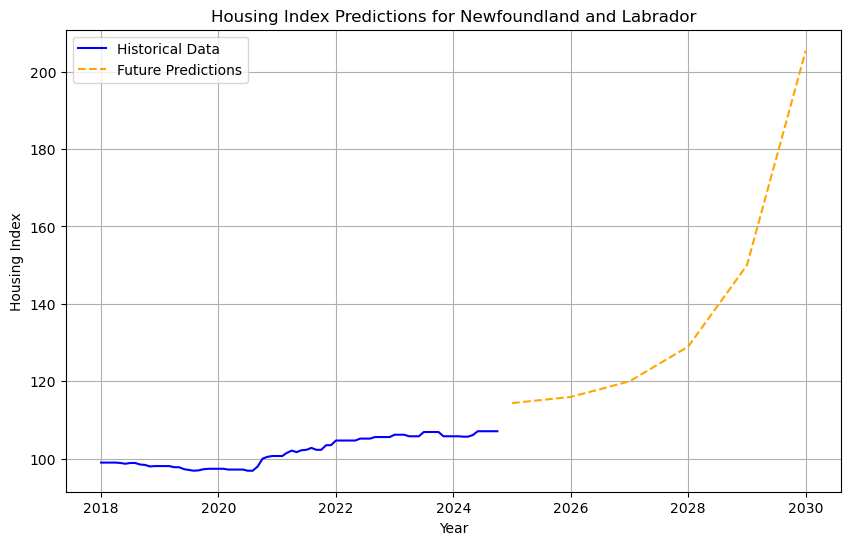

Processing: St. John's, Newfoundland and Labrador


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2641  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2107 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1600 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1239 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0682 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0435 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0345 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0383 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0213 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0227 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '107.1' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


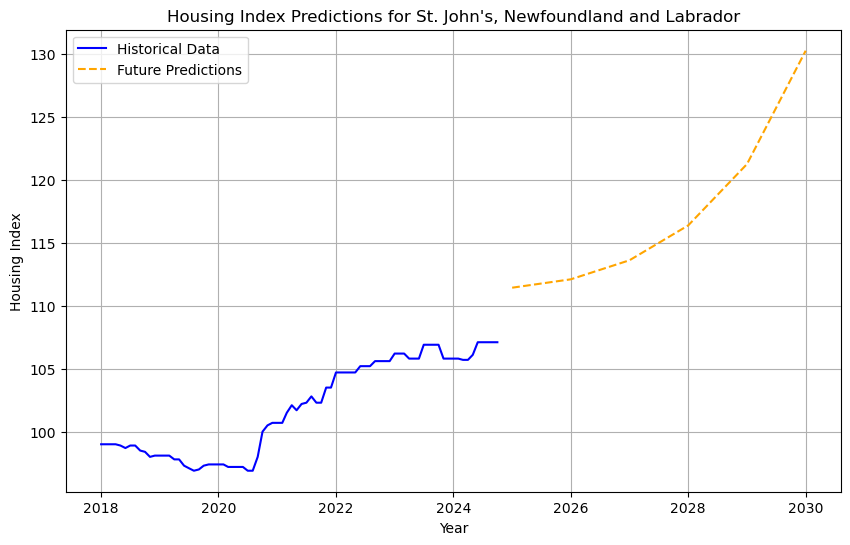

Processing: Prince Edward Island
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3364  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3246 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2736 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1586 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0479
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0386 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0314 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0208 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0198 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/s

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


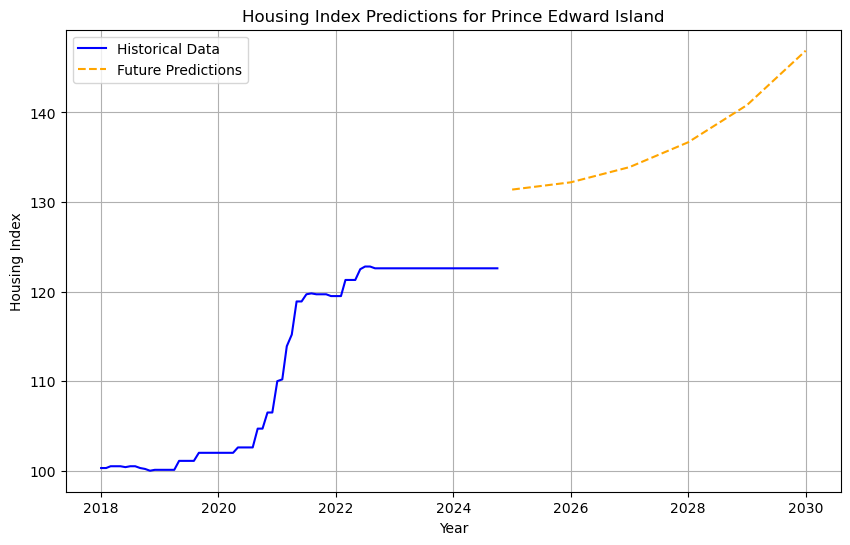

Processing: Charlottetown, Prince Edward Island
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4351  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4045 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3803 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2656 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2293 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1027 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0767 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0497 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0304 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0287 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0285 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


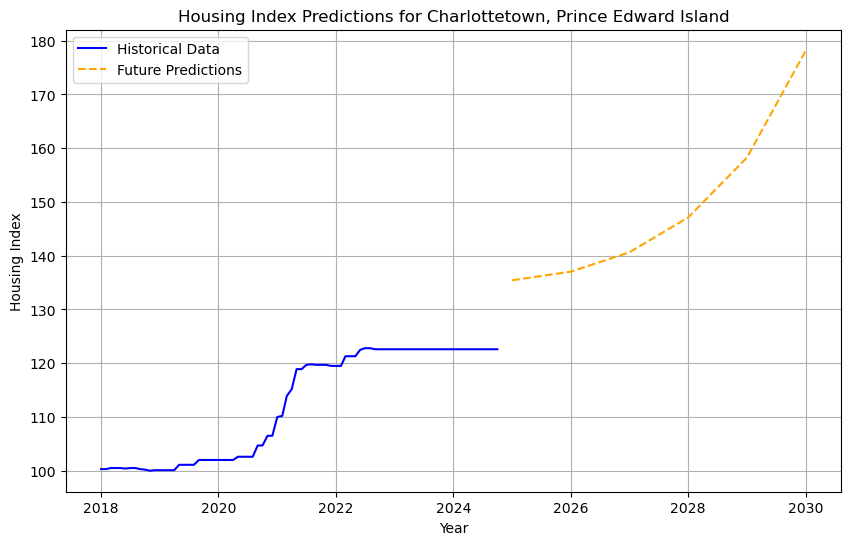

Processing: Nova Scotia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3676  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3393 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2534 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1370 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0760 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0610 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0381 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0365 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0173 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.7' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


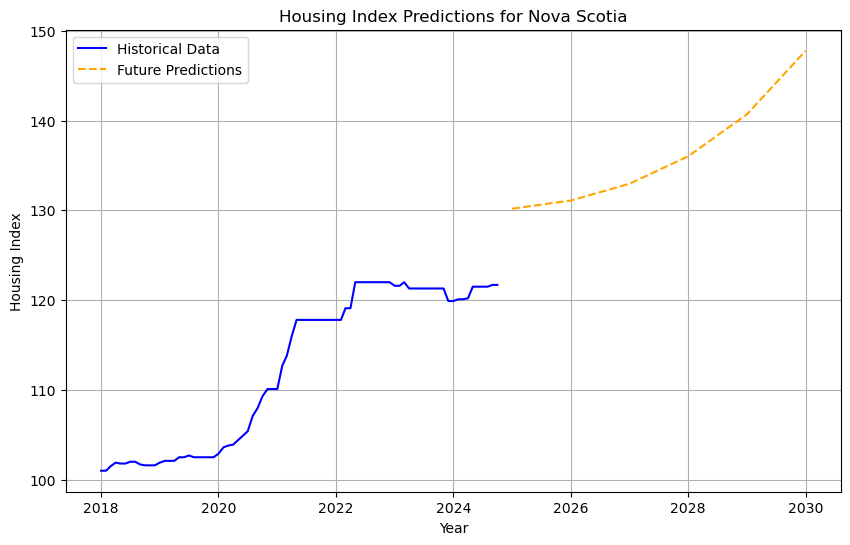

Processing: Halifax, Nova Scotia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3379  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2600 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2437 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1810 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0850 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0379 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0310 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0239 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0225 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.7' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


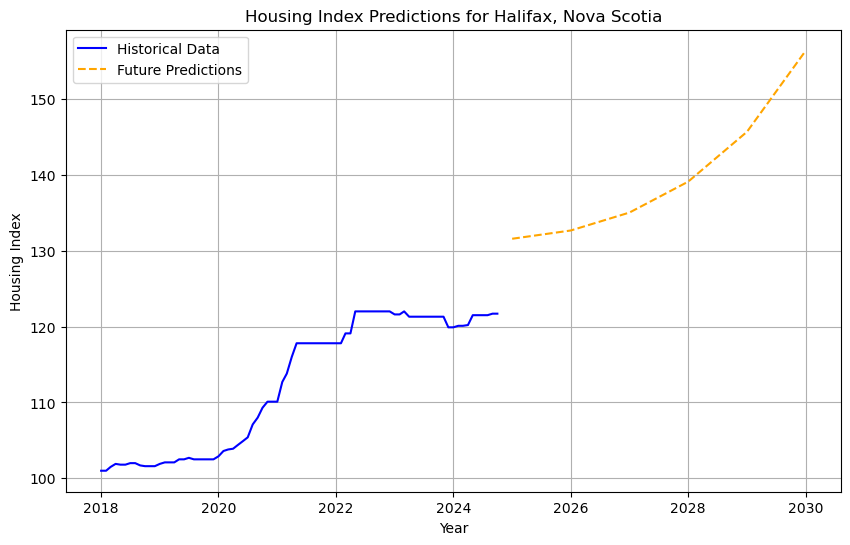

Processing: New Brunswick
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3072  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2859 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2164 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2191 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1132 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0513 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

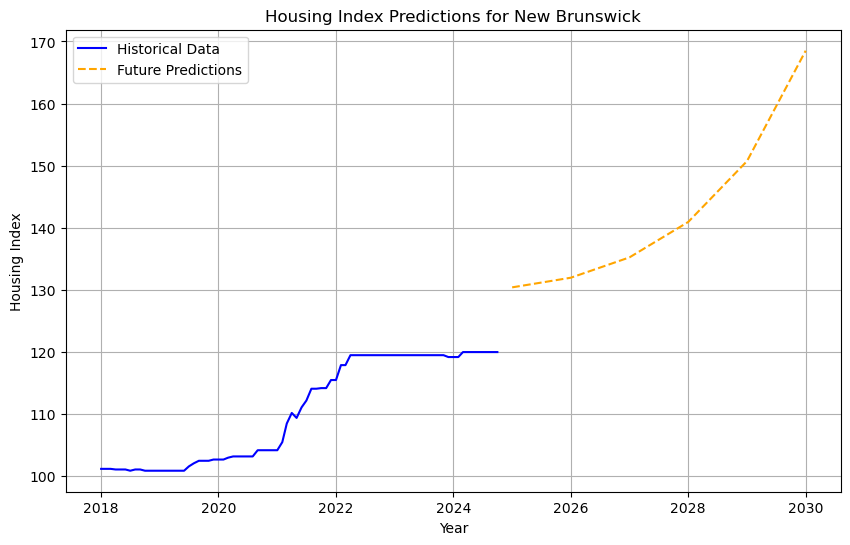

Processing: Saint John, Fredericton, and Moncton, New Brunswick
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3071
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2457 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2085 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1764 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0896 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0307 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

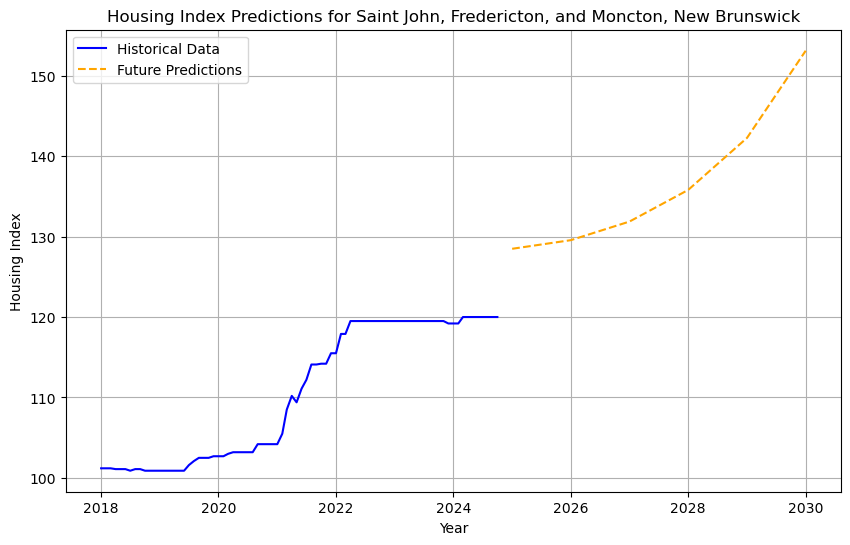

Processing: Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3459  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3126 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2998 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1745 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0923 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0534 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0441 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0386 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0292 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0239 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0132 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073     
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0077 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '143.3' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


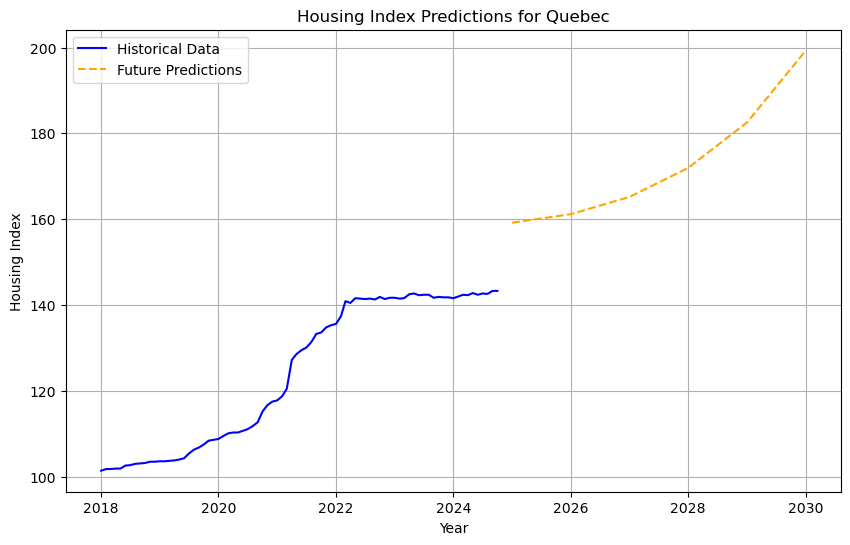

Processing: Québec, Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2583  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2487 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2182 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1392 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1497 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1214 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0770 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0476 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0359 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0202 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0079 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '132.7' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


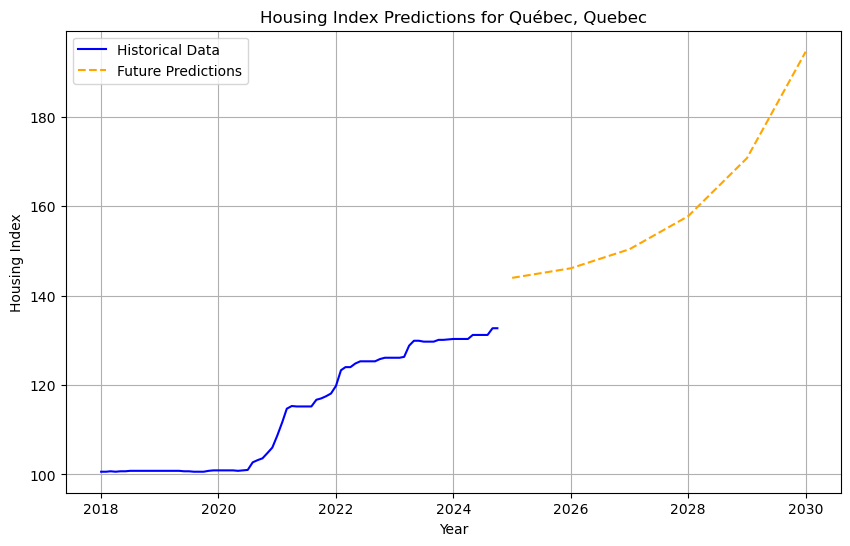

Processing: Sherbrooke, Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2220  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1527 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1171 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0787 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0141 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0085 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0084 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110.9' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


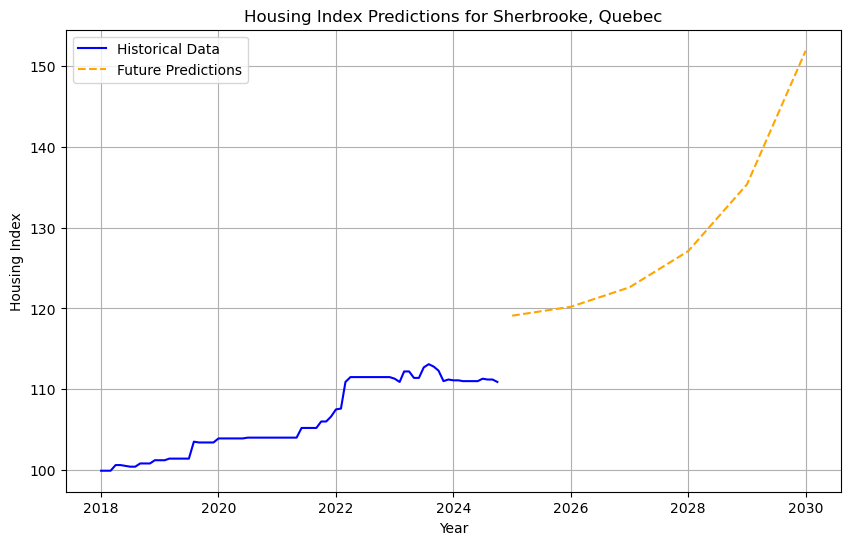

Processing: Trois-Rivières, Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2617  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1957 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1539 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0487 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0200 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0107 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0086 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0060 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0090 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '114.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


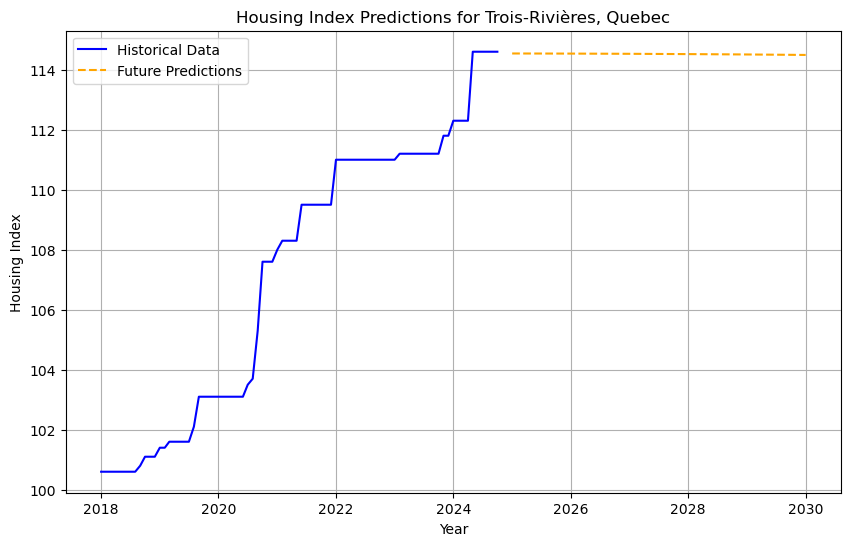

Processing: Montréal, Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3590
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2978 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2627 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1788 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0879 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0539 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0602 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0358 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0243 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0093 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '152.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


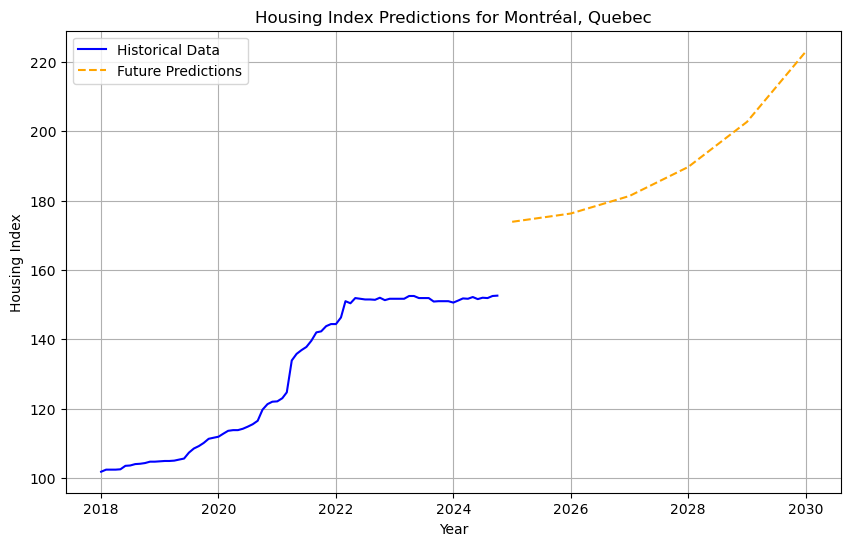

Processing: Ottawa-Gatineau, Quebec part, Ontario/Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5389  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3958 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4020 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3062 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1405 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0544 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0308 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0268 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0262 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0232 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '115.8' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


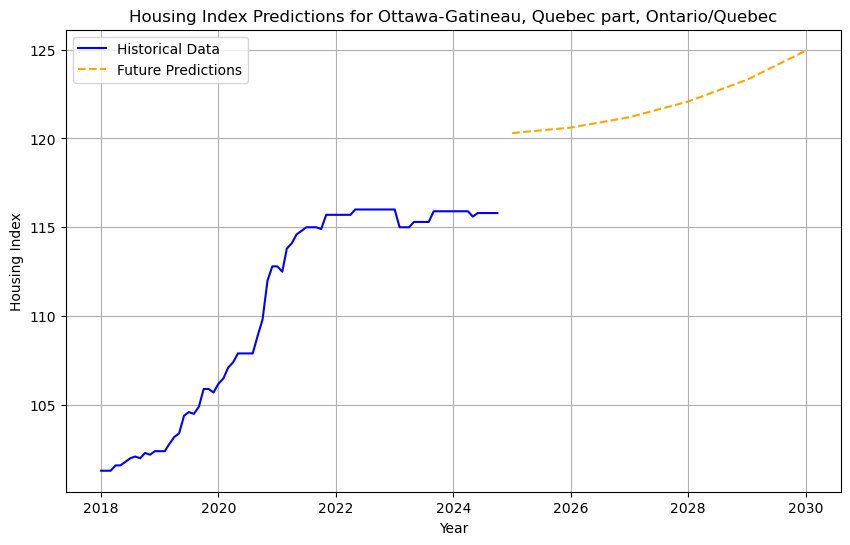

Processing: Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3281  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3006 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2537 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1717 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0749 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0618 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0523 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0437 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0326 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0221 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0174 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0167 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '123.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


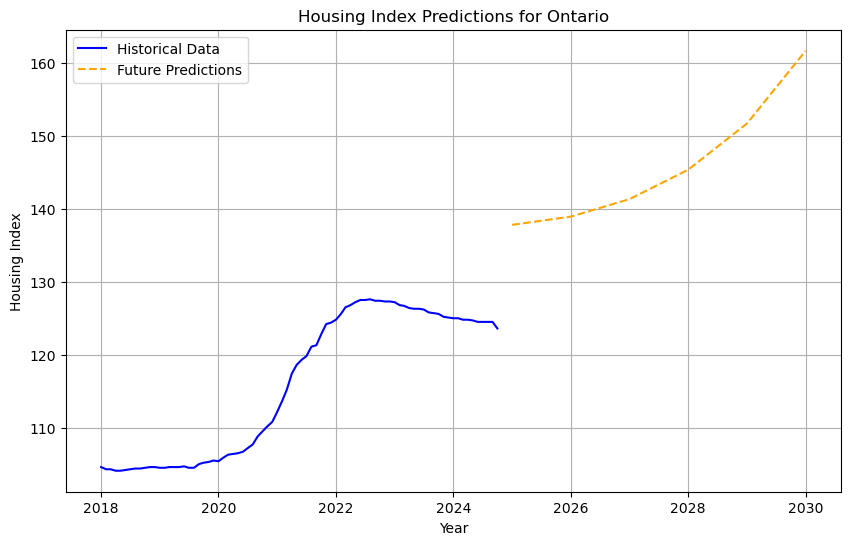

Processing: Ottawa-Gatineau, Ontario part, Ontario/Quebec
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3964  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3669 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3474 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2783 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1898 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1101 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0474 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0450 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0330 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '163.4' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


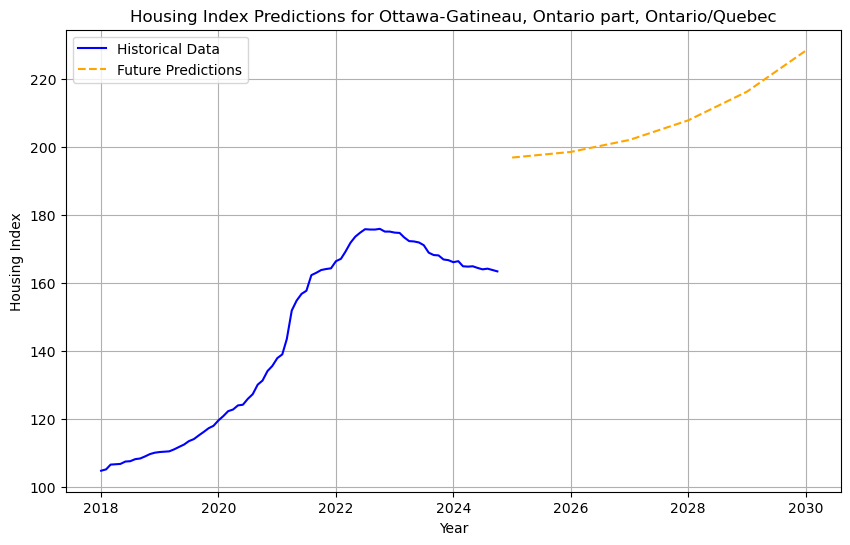

Processing: Oshawa, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3352  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3793 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2855 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1901 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1083 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1073 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0804 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0634 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0535 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0400 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0351 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0276 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


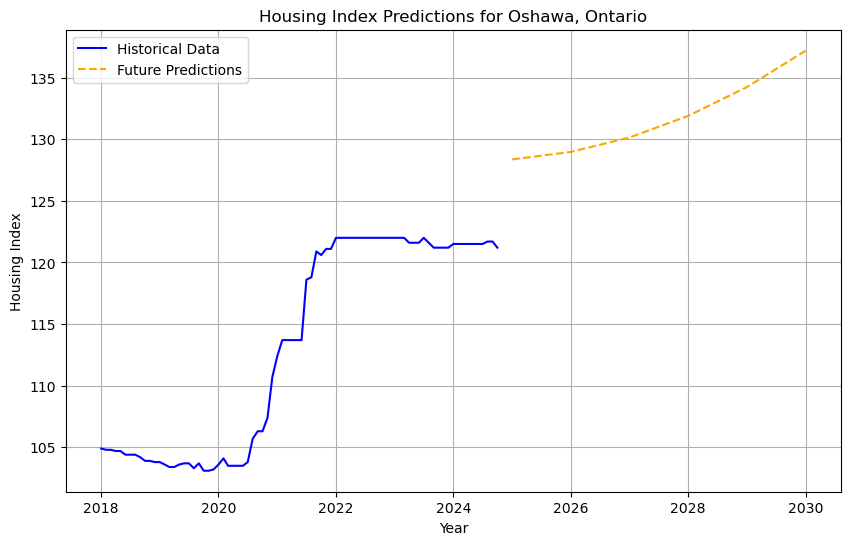

Processing: Toronto, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4027  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2835 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1627 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1521 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0771 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0868 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0658 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0380 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0254 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0272 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


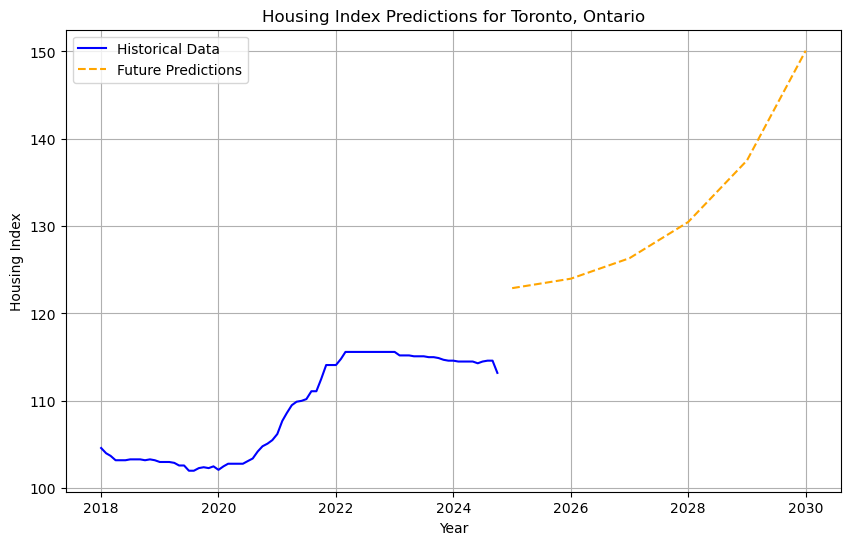

Processing: Hamilton, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4756
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3901 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3528 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1961 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0948 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0722 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0678 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0575 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0521 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0394 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0404 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0423 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0354 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '114.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


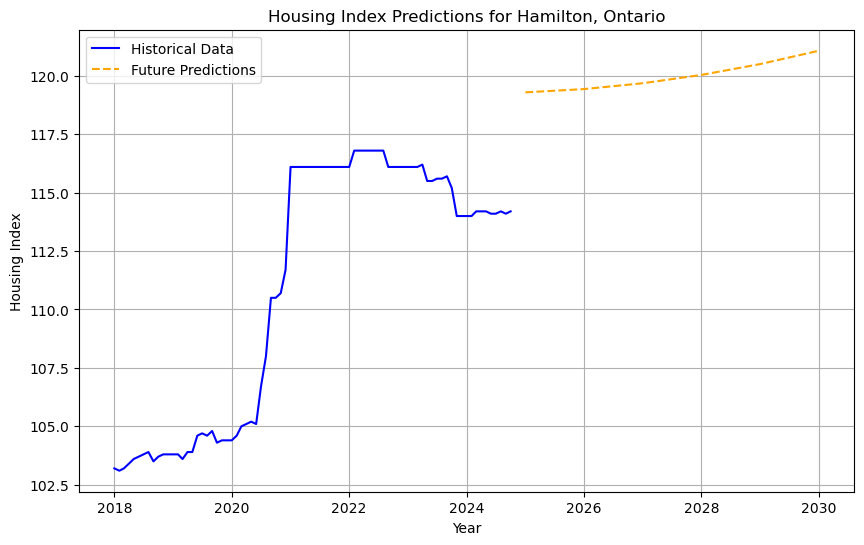

Processing: St. Catharines-Niagara, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3372  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3255 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2032 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1155 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0595 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0597 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0413 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0339 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0218 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '125.4' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


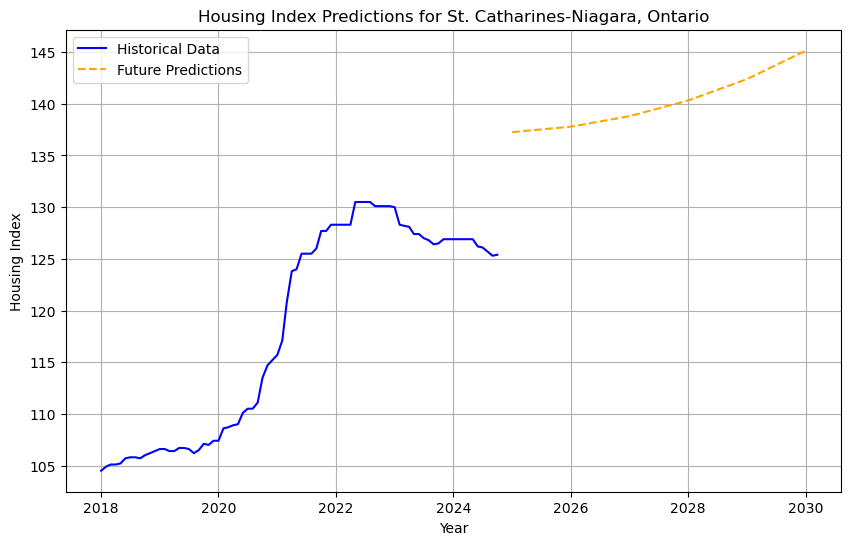

Processing: Kitchener-Cambridge-Waterloo, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3444  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3030 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2092 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1155 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0667 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0377 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '154.3' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


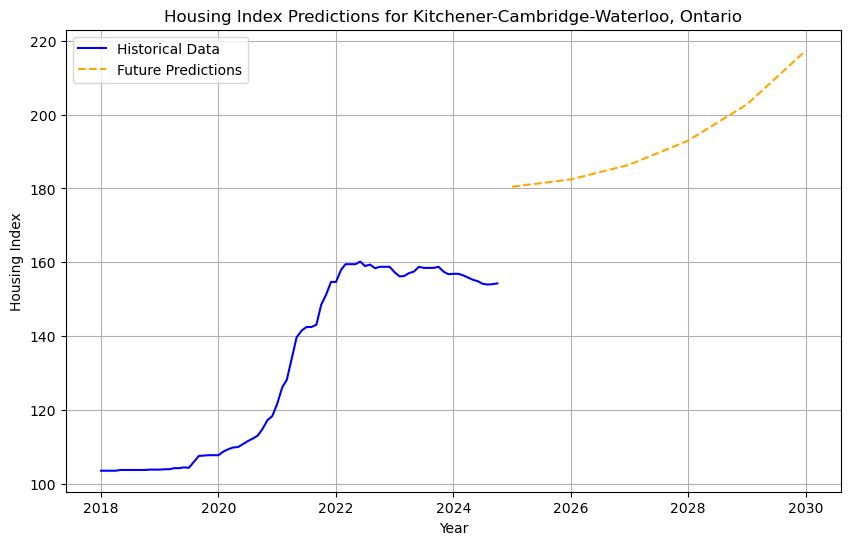

Processing: Guelph, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5152  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3905 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4017 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2989 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1642 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0777 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0685 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0519 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0360 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0348 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0273 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0293 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


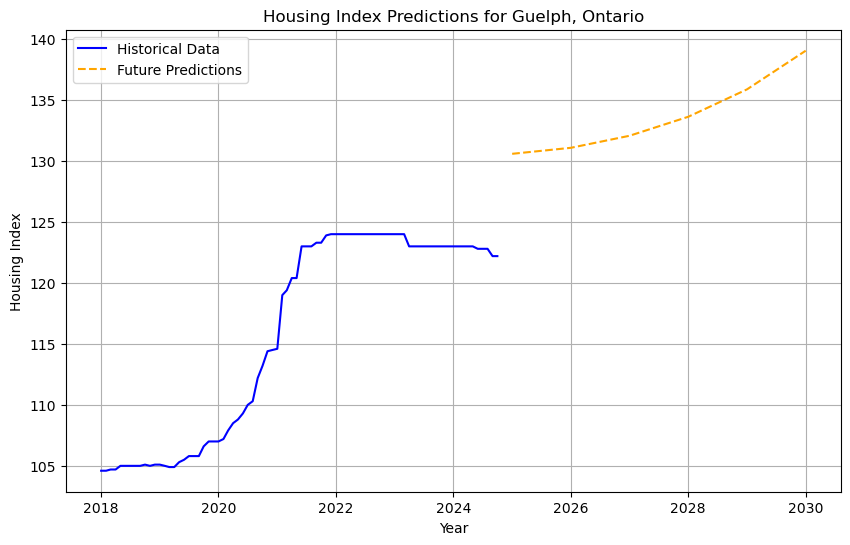

Processing: London, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3799  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2626 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2197 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1114 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0526 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0407 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0361 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '142.9' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


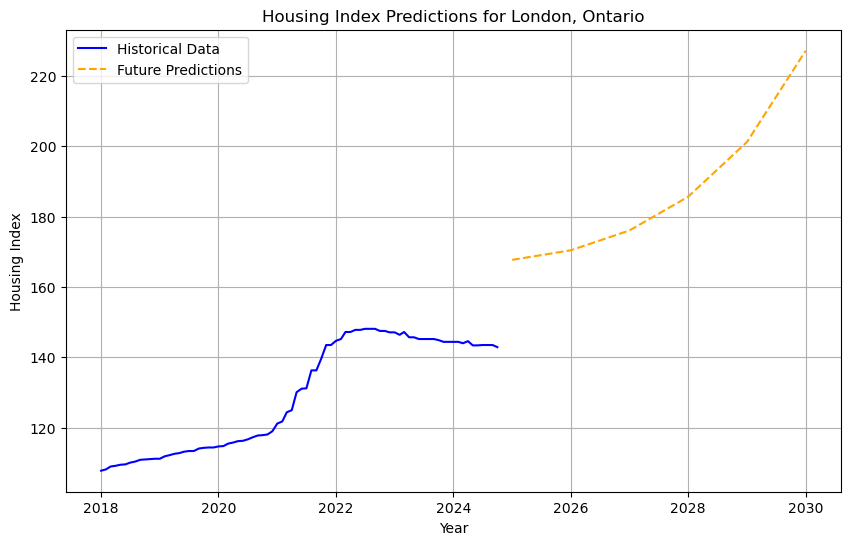

Processing: Windsor, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3339  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2414 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2088 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1077 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0620 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0627 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0427 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0313 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0215 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

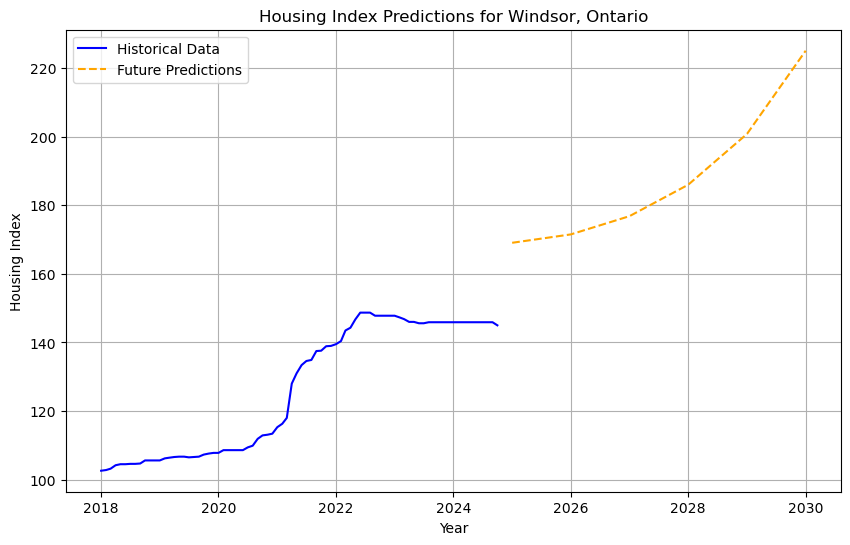

Processing: Greater Sudbury, Ontario
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3195  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2813 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1493 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1059 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0704 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0636 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0606 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0453 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0367 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0362 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0241 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0337 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0271 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '118.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


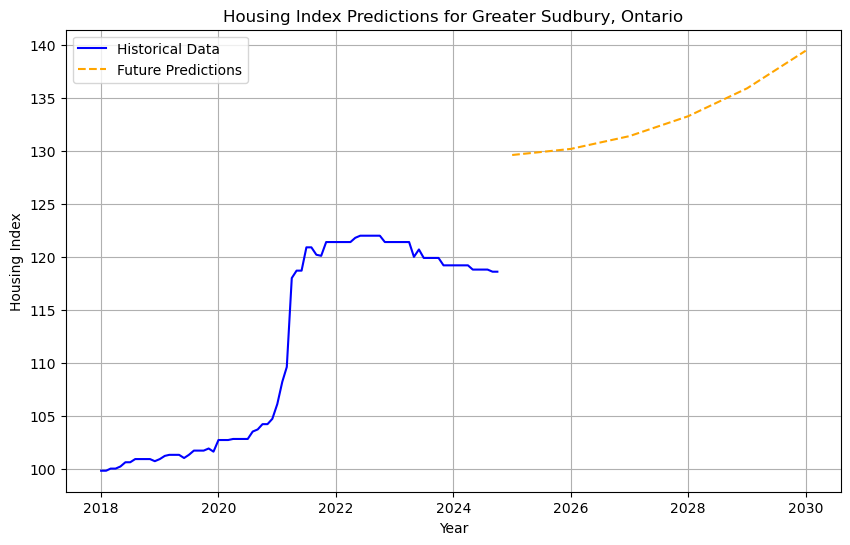

Processing: Prairie Region
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1645
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1638 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1778 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1338 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0686 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0518 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0418 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0333 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0224 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0192 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.9' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


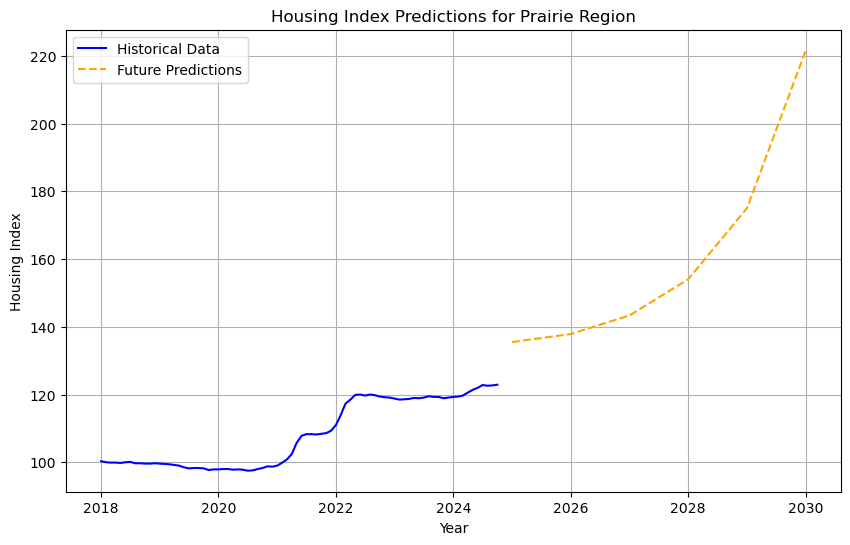

Processing: Manitoba
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2443  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2333 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2165 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1951 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1036 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0731 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0663 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0433 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0388 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0195 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0157 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '140.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


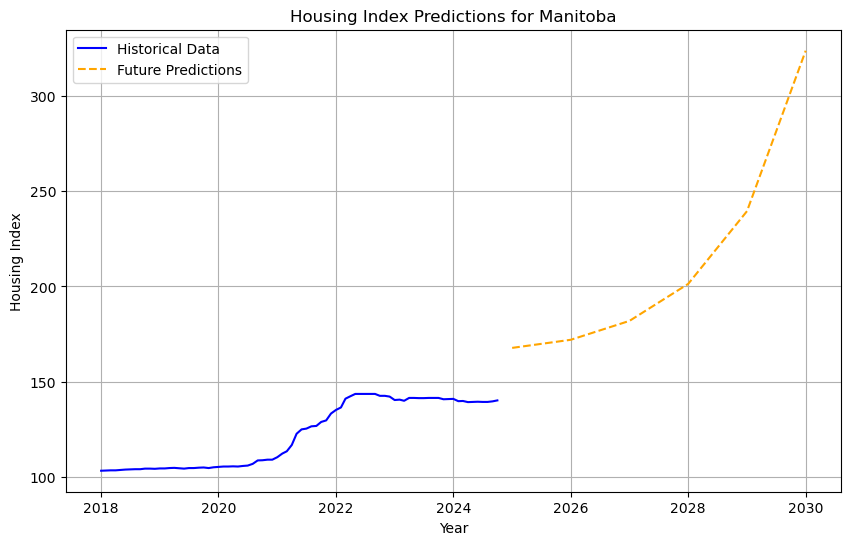

Processing: Winnipeg, Manitoba
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3649  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2877 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2432 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1506 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0878 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0604 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0398 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0210 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '140.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


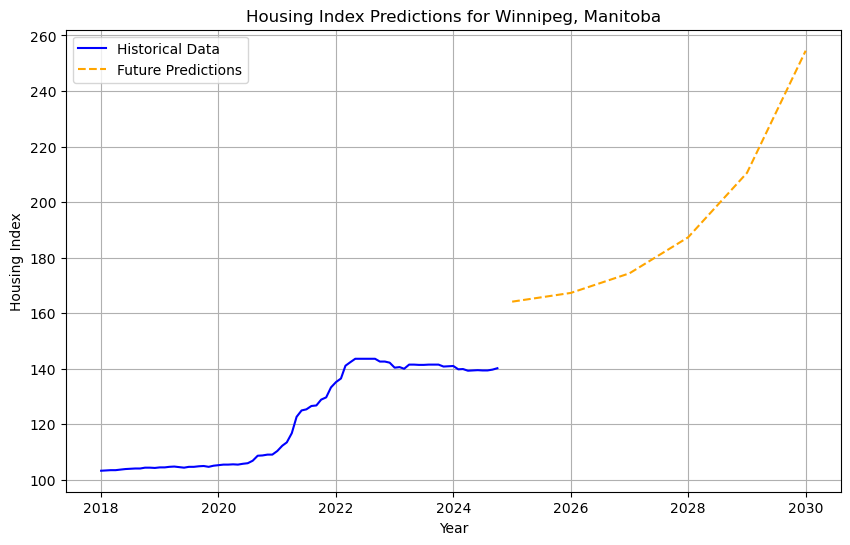

Processing: Saskatchewan
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3285  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2346 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1866 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1441 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0871 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0689 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0541 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0527 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0510 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0425 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0474 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0355 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0363 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0323 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '105.7' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


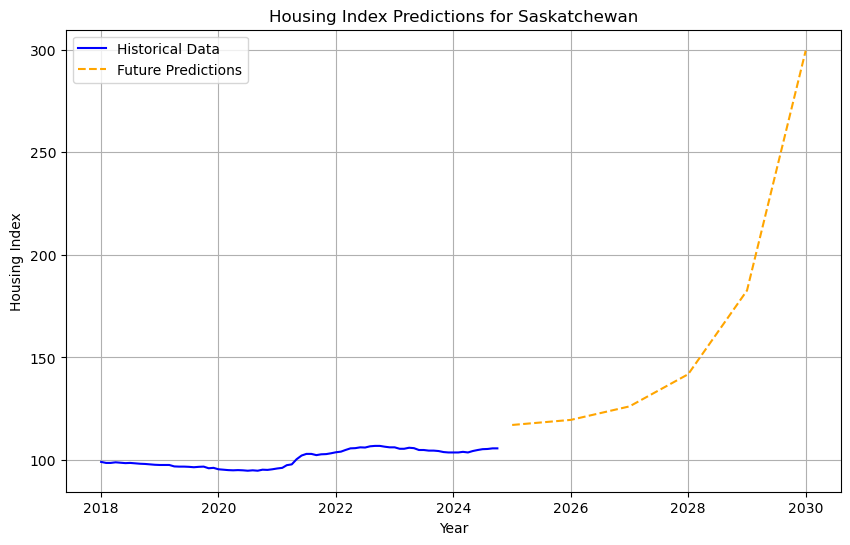

Processing: Regina, Saskatchewan
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3765  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2977 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2347 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1269 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0777 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0904 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0575 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0757 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0679 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0671 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0611 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0515 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0470 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0462 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


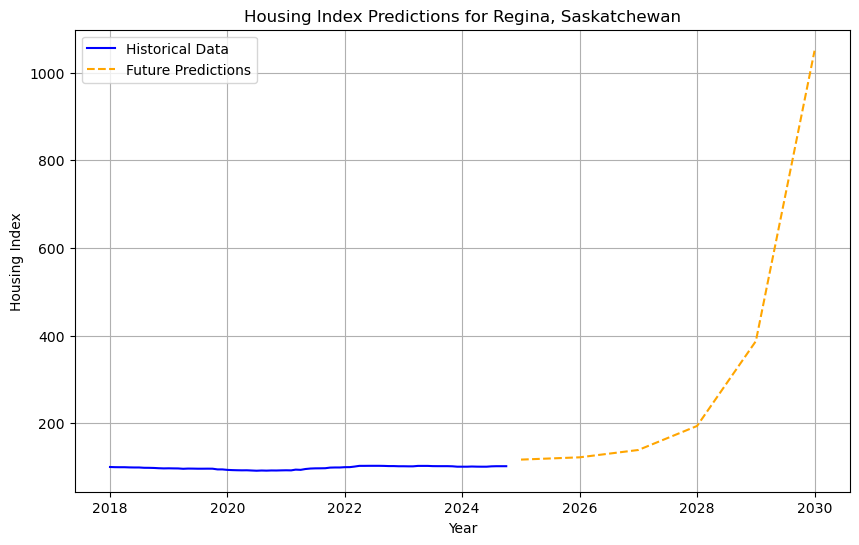

Processing: Saskatoon, Saskatchewan
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2707  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2207 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2370 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1214 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0849 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0792 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0690 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0547 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0452 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0435 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0377 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0288 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0275 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '107.8' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


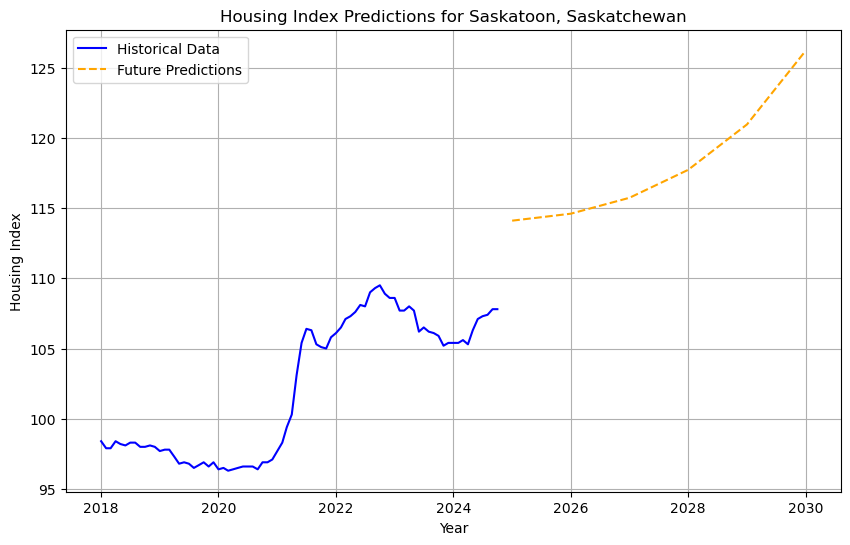

Processing: Alberta
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1511  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1432 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1228 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0907 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0550 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0572 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0490 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0437 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0216 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0205 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


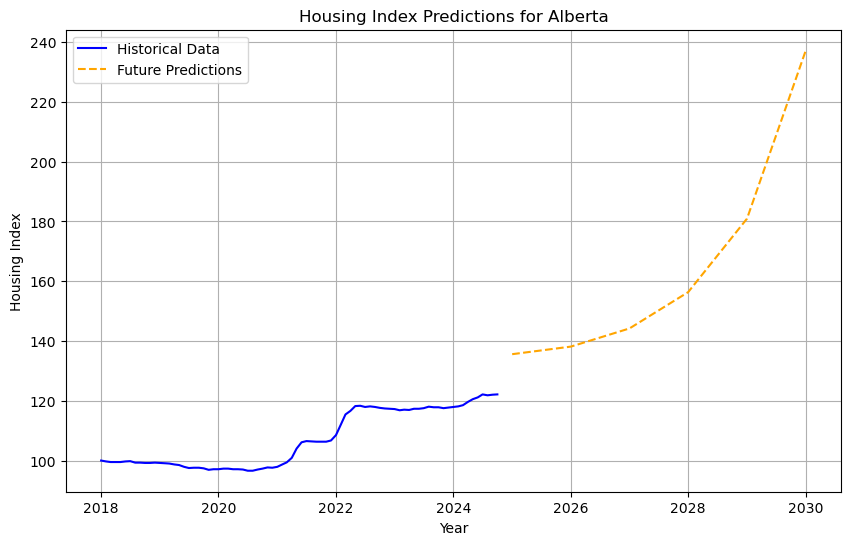

Processing: Calgary, Alberta
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1939  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1347 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0968 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0684 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0573 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0485 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0430 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0371 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0252 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

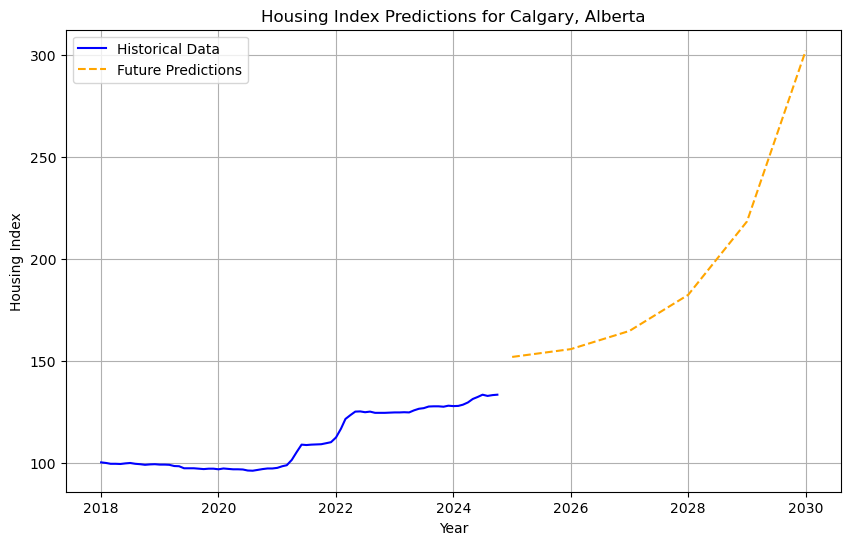

Processing: Edmonton, Alberta
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2578
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2451 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1574 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0858 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0674 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0659 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0490 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0533 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0436 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0414 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0328 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0318 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0321 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.4' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


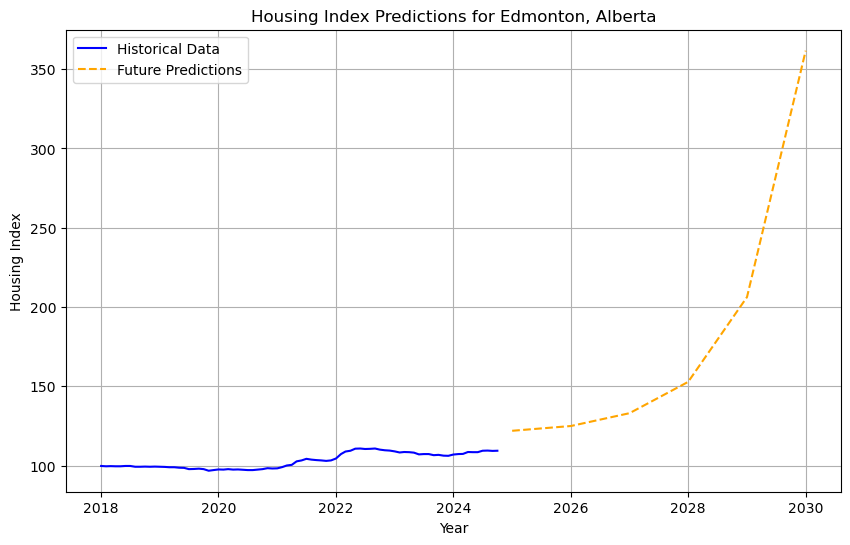

Processing: British Columbia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2916  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2967 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1796 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0740 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0710 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0454 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0521 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0342 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0269 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0275 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0223 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0203 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0191 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '126.6' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


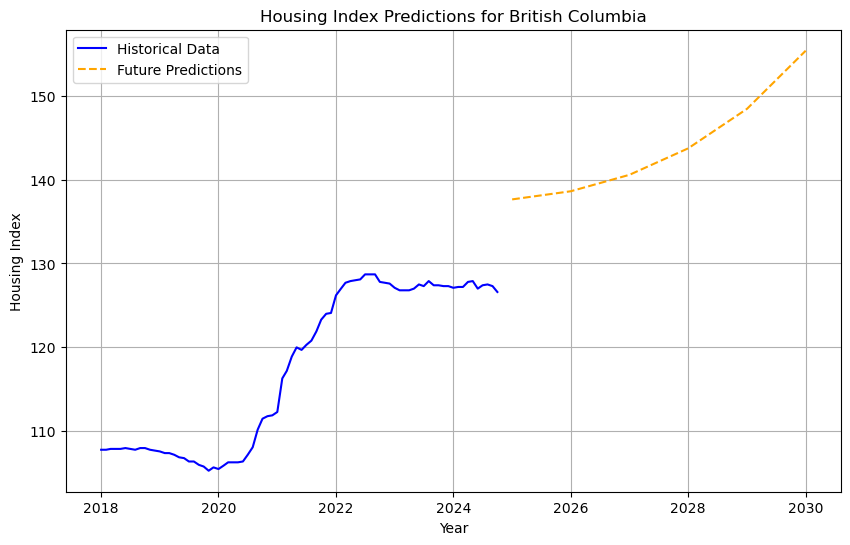

Processing: Kelowna, British Columbia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3456  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2463 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1617 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1321 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0701 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0749 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0617 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0442 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0237 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '122.2' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


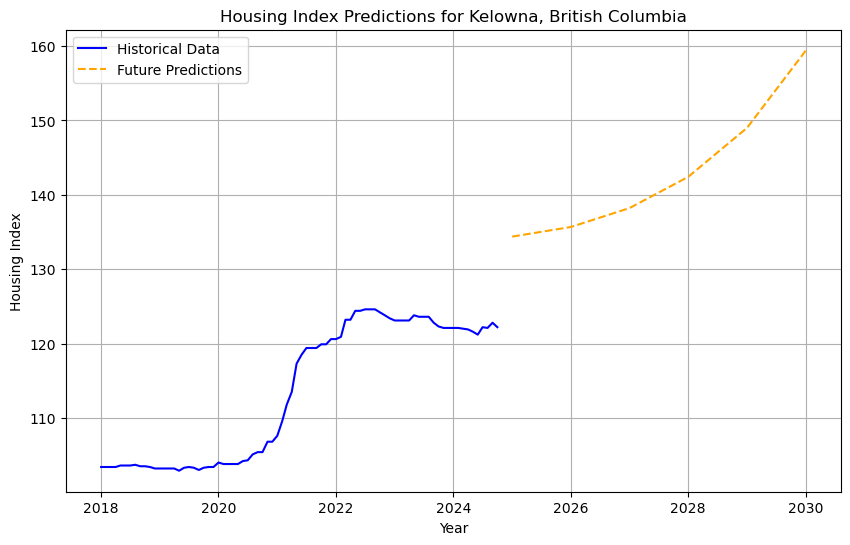

Processing: Vancouver, British Columbia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3801  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3105 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2909 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2010 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0884 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0685 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0663 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0557 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0410 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0353 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0264 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0233 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0245 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0219 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '127.8' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


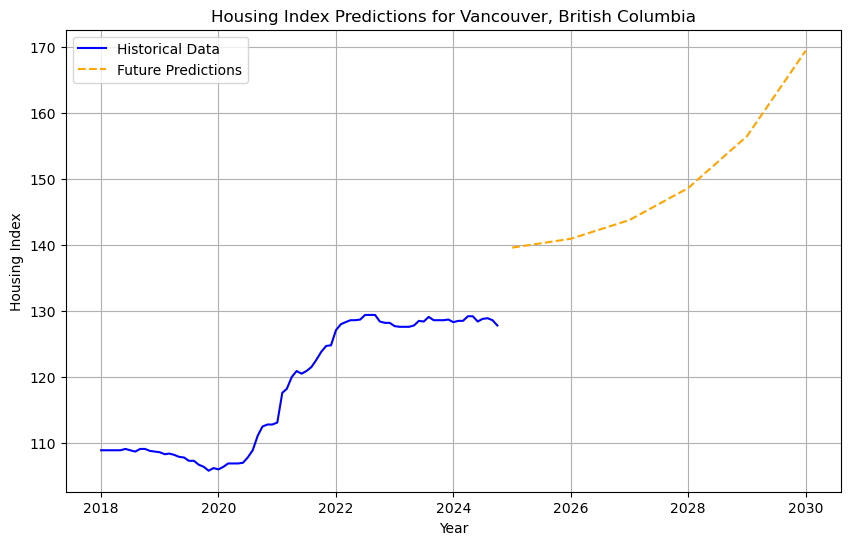

Processing: Victoria, British Columbia
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3496  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2653 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1626 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1230 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0772 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0868 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0659 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0478 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0213 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0238 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0202 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

/var/folders/14/w0mpy8s94qb0q45xnnp41g440000gn/T/ipykernel_24106/1683895339.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '119.3' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value


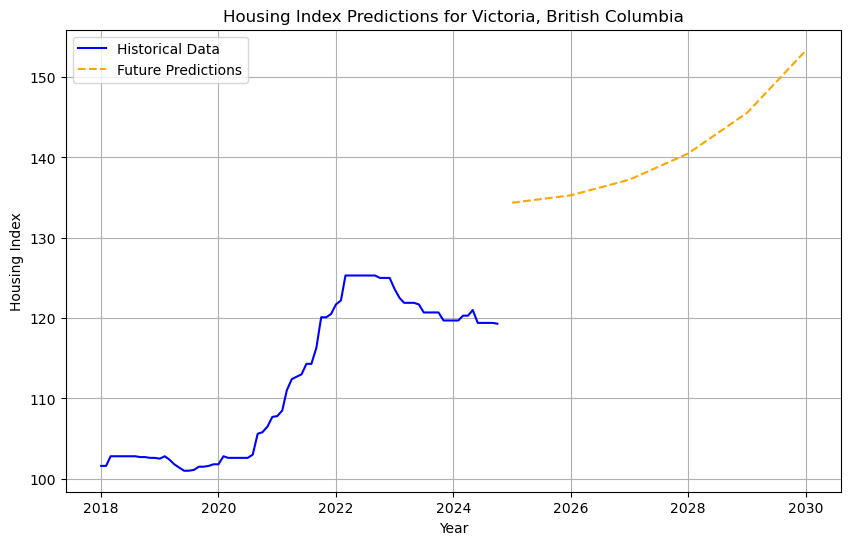

Processing: Canada
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3458  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2855 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2260 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2129 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0807
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0674 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0502 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0324 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

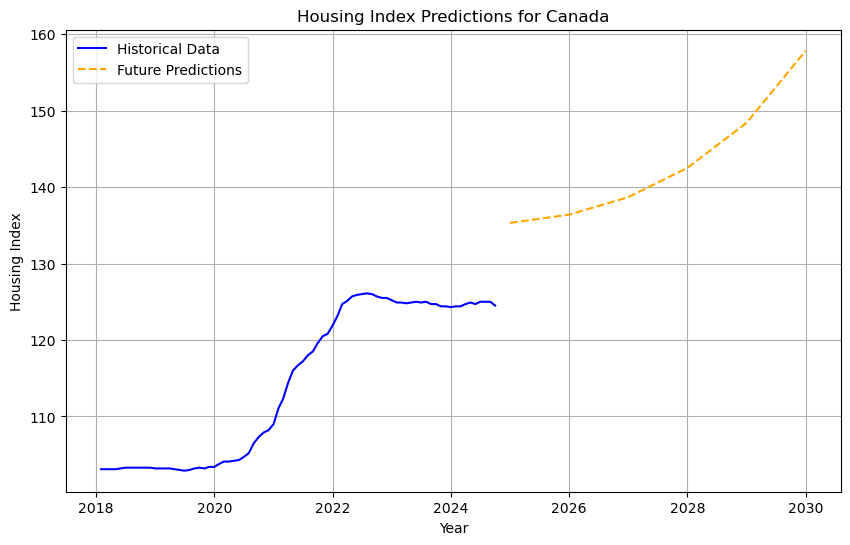

Processing: Atlantic Region
Epoch 1/50


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3133  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2330 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1952 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1233
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0767 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0605
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0562
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0459 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0327
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0250 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0205 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0192
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0171
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0176 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

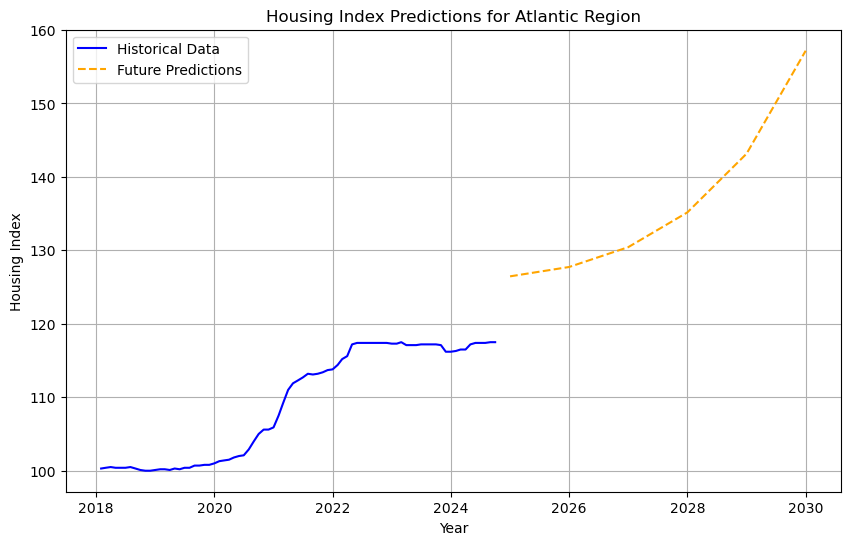

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Convert the 'Date' column to datetime format
housing_index_final['Date'] = pd.to_datetime(housing_index_final['Date'], errors='coerce')

# Extract year from the Date column
housing_index_final['Year'] = housing_index_final['Date'].dt.year

# Get unique geographies
unique_geographies = housing_index_final['Geography'].unique()

# Define sequence length (how many years the model looks back to predict the next)
sequence_length = 5  # You can adjust this

# Loop through each unique geography
for geography in unique_geographies:
    print(f"Processing: {geography}")
    
    # Filter data for the current geography
    geo_data = housing_index_final[housing_index_final['Geography'] == geography]

    # Sort by Date to maintain time order
    geo_data = geo_data.sort_values(by='Date')

    # Extract features and target
    X_geo = geo_data[['Year']].values.reshape(-1, 1)  # Feature: Year
    y_geo = geo_data['Index Value'].values.reshape(-1, 1)  # Target: Index Value
    
    # Normalize the data
    scaler = MinMaxScaler()
    X_geo_scaled = scaler.fit_transform(X_geo)
    y_geo_scaled = scaler.fit_transform(y_geo)

    # Create sequences for LSTM (rolling window)
    X_sequences, y_sequences = [], []
    for i in range(len(X_geo_scaled) - sequence_length):
        X_sequences.append(X_geo_scaled[i:i + sequence_length])
        y_sequences.append(y_geo_scaled[i + sequence_length])

    X_sequences, y_sequences = np.array(X_sequences), np.array(y_sequences)

    # Split data into training and testing sets (80% train, 20% test)
    train_size = int(len(X_sequences) * 0.8)
    X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
    y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

    # Build LSTM model
    model = Sequential([
        LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, activation='relu'),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

    # Predict future values up to 2030
    last_sequence = X_sequences[-1]  # Start with the last known sequence
    future_years = np.arange(geo_data['Year'].max() + 1, 2031).reshape(-1, 1)
    future_predictions = []

    for year in future_years:
        # Reshape for LSTM input
        next_pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
        future_predictions.append(next_pred[0, 0])

        # Update last_sequence with the new predicted value
        last_sequence = np.roll(last_sequence, -1)
        last_sequence[-1] = next_pred

    # Transform predictions back to original scale
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1)).flatten()

    # Create a DataFrame for future predictions
    future_dates_geo = pd.DataFrame({'Year': future_years.flatten(), 'predicted_index': future_predictions})
    future_dates_geo['Date'] = pd.to_datetime(future_dates_geo['Year'].astype(str) + '-01-01')

    # Ensure a smooth transition by keeping the last known data point
    last_index_value = y_geo[-1, 0]  # Last known Index Value
    future_dates_geo.loc[future_dates_geo['Year'] == geo_data['Year'].max(), 'predicted_index'] = last_index_value

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(geo_data['Date'], geo_data['Index Value'], label='Historical Data', color='blue')
    plt.plot(future_dates_geo['Date'], future_dates_geo['predicted_index'], label='Future Predictions', color='orange', linestyle='--')
    plt.xlabel('Year')
    plt.ylabel('Housing Index')
    plt.title(f'Housing Index Predictions for {geography}')
    plt.legend()
    plt.grid(True)
    plt.show()
